In [1]:
import os

import numpy as np

import cv2
from matplotlib import pylab as plt

import keras
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16

from utils import rgb2tensor,imagenet_dict

Using TensorFlow backend.


In [3]:
model_prediction = VGG16(weights='imagenet', include_top=True)
model_features = VGG16(weights='imagenet', include_top=False)

553467904/553467096 [==============================] - 61s    


In [4]:
print model_prediction.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
block1_conv1 (Convolution2D)     (None, 224, 224, 64)  1792        input_1[0][0]                    
____________________________________________________________________________________________________
block1_conv2 (Convolution2D)     (None, 224, 224, 64)  36928       block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)       (None, 112, 112, 64)  0           block1_conv2[0][0]               
___________________________________________________________________________________________

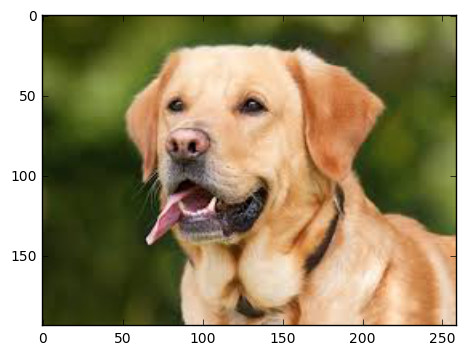

In [5]:
img_path = os.path.join("data","dog.jpg")
img = cv2.imread(img_path)
img_plt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_plt)
plt.show()

In [10]:
img = cv2.resize(img,(224,224))
img_tensor = rgb2tensor(img)
output = model_prediction.predict(img_tensor)
prediction = imagenet_dict[np.argmax(output)]
print "Label: {} Probabilty: {} %".format(prediction,output[0,np.argmax(output)]*100) 

Label: Labrador retriever Probabilty: 54.1834414005 %
